In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

In [3]:
def rotate_image(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]
    if center is None:
        center = (w / 2, h / 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    return cv2.warpAffine(image, M, (w, h))


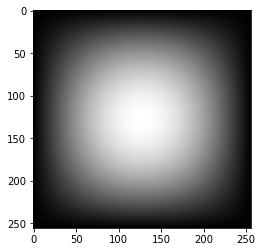

In [4]:


window1d = np.abs(np.hanning(256))
window2d = np.sqrt(np.outer(window1d,window1d))
plt.imshow(window2d,cmap="gray")


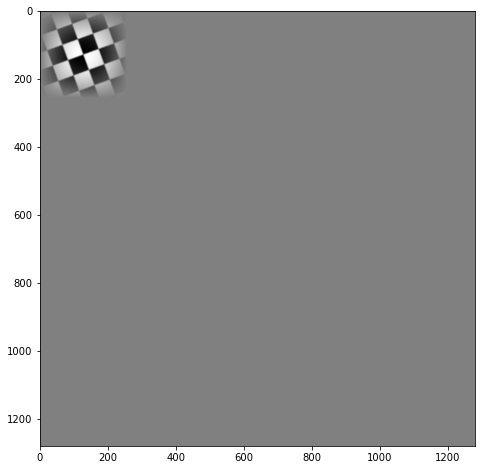

In [27]:


def np_binary_grid(L, C):
    assert L % C == 0
    r = np.arange(C, dtype=np.uint8) & 1
    r = np.kron(r, np.ones(L // C, dtype=np.uint8))
    # `^ 1` fill force upper-left cell to consist of 1s
    return (r ^ 1) ^ r[:, None]

grid = np_binary_grid(256, 8)
grid = rotate_image(grid, 20 ,scale = 1.5)
grid = grid - grid.mean()
grid = cv2.GaussianBlur(grid,(5,5),cv2.BORDER_DEFAULT)
grid = np.multiply(grid,window2d)
padding_amount = 256*4
grid = np.pad(grid, [(0, padding_amount), (0, padding_amount)])
fig = plt.figure(figsize=(12,8))
plt.imshow(grid,cmap="gray")

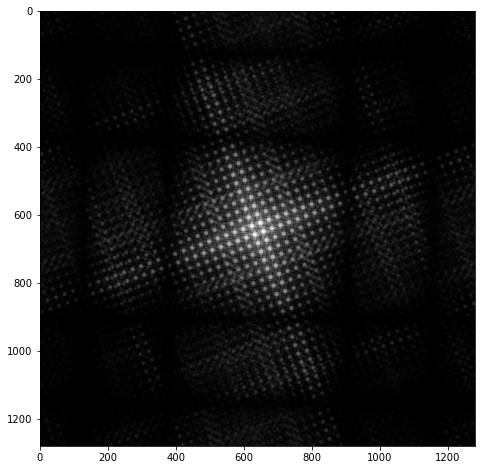

In [28]:
fft = np.fft.fftshift(abs(np.fft.fft2(grid)))
fig = plt.figure(figsize=(12,8))
plt.imshow(np.log(fft+1),cmap="gray")

In [30]:
fft = np.fft.fftshift(abs(np.fft.fft2(grid)))
rawfft = np.fft.fftshift(np.fft.fft2(grid))
(h, w) = fft.shape[:2]
new = np.zeros((h, w),dtype=np.complex128)
cx = h//2
cy = w//2
for i in range(3):
    max = np.amax(fft)
    x = np.where(fft == max)
    for j in range(len(x[0])):
        print(x[0][j]-cx, x[1][j]-cy,max)
        fft[x[0][j],x[1][j]] = 0
        new[x[0][j],x[1][j]] = rawfft[x[0][j],x[1][j]]


-17 8 5304.2209829923895
17 -8 5304.2209829923895
8 17 5295.8391465297755
-8 -17 5295.839146529775


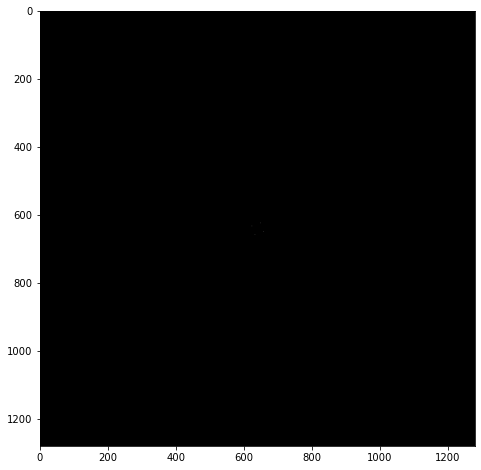

In [31]:
fig = plt.figure(figsize=(12,8))
plt.imshow(np.log(abs(new)+1),cmap="gray")

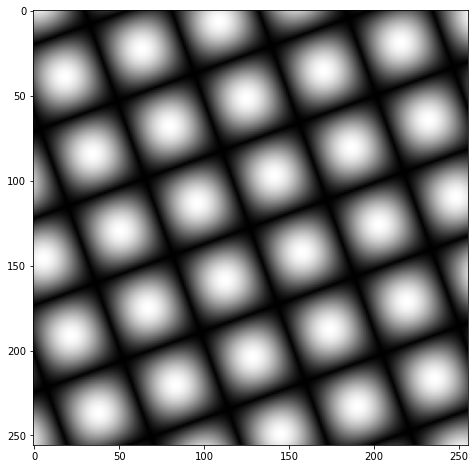

In [32]:
rawfft = np.fft.fftshift(np.fft.fft2(grid))
fig = plt.figure(figsize=(12,8))
stuff = np.fft.ifft2(np.fft.ifftshift(new))
plt.imshow(np.abs(stuff[:256,:256]),cmap="gray")

In [10]:
import sys
np.set_printoptions(threshold=sys.maxsize)

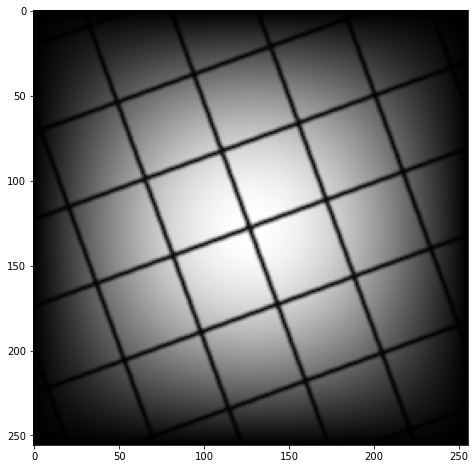

In [33]:
main = np.abs(stuff[:256,:256])
fig = plt.figure(figsize=(12,8))
plt.imshow(abs(grid[:256,:256]),cmap = "gray")


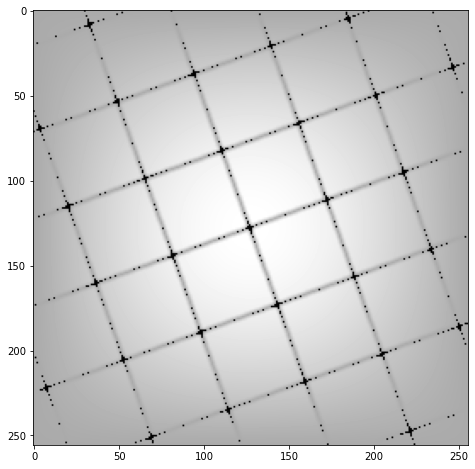

In [42]:
x = np.where(main <= 1000*np.amin(main) ,0 ,1)
fig = plt.figure(figsize=(12,8))
plt.imshow(x+abs(grid[:256,:256]),cmap = "gray")


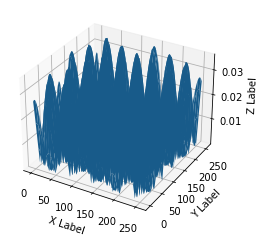

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = range(256), range(256)
X, Y = np.meshgrid(x, y)


ax.plot_surface(X, Y, main)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [13]:
mean

NameError: name 'mean' is not defined